In [1]:
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('Position_CSV/TE_dat.csv')
df.head()

,Unnamed: 0,name,approximate_value,games.x,AVp16,X1,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,...,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year,X
0,1,Jerell Adams,2,30,1.066667,Career,NaN,1.0,NaN,0.0,...,7.0,NaN,231.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2,Kyle Adams,0,29,0.000000,Career,NaN,1.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,3,Jordan Akins,6,32,3.000000,Career,NaN,0.0,NaN,0.0,...,8.0,NaN,249.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,4,Chase Allen,4,21,3.047619,Career,NaN,0.0,NaN,0.0,...,2.0,NaN,245.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,5,Dwayne Allen,13,86,2.418605,Career,NaN,2.0,NaN,NaN,...,12.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [3]:
df.drop(['name', 'approximate_value', 'games.x', 'X1', 'height', 'player_id', 'position', 'team_abbreviation', 'season', 'year', 'X'], axis=1, inplace=True)

In [4]:
df.fillna(0, inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['kickoff_return_touchdowns', 'other_touchdowns', 'plays_from_scrimmage', 'points', 'punt_return_touchdowns', 'receiving_touchdowns', 'receiving_yards', 'receiving_yards_per_reception', 'receptions', 'rushing_and_receiving_touchdowns', 'total_touchdowns', 'two_point_conversions', 'yards_from_scrimmage', 'yards_from_scrimmage_per_play']])
Y = np.asarray(df['AVp16'])
                  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -0.059239468144495204
Weights:  [ 0.00000000e+00  6.93889390e-18  4.44089210e-16  1.82857339e-01
 -4.19268501e-42 -3.50324616e-46  0.00000000e+00 -3.64629801e-63
  1.32651549e-73  2.15904214e-78 -1.03840561e+00  3.20664551e+00
  0.00000000e+00  0.00000000e+00]


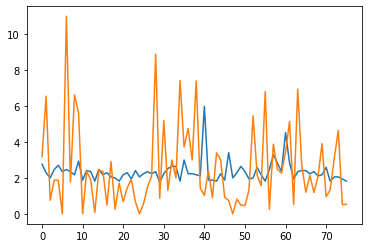

In [6]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['receiving_yards_per_reception', 'receptions', 'rushing_and_receiving_touchdowns']])
Y = np.asarray(df['AVp16'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -0.09540865604420778
Weights:  [-0.01517759 -0.01812249 -0.03171436]


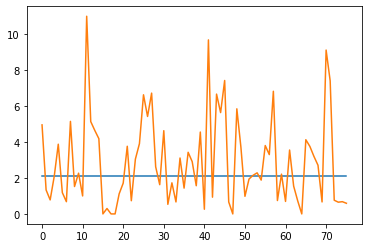

In [8]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  -0.09540958030658686
Weights:  [-0.01517133 -0.01811502 -0.03170128]


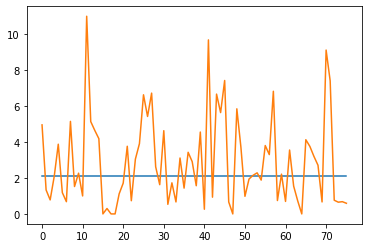

In [9]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [10]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
-0.021264067309648454
[ 7.97127539e+11 -5.85121602e+11 -4.71272640e+10]

Ridge Regression
-0.021866705035183752
[-0.01182454 -0.01411885 -0.02470799]
